In [1]:
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn import metrics

# Klasifikatori
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from xgboost import XGBClassifier

In [372]:
df_final = pd.read_csv('credit_risk_df_final.csv')

In [373]:
df_class = df_final['Target']
df_var = df_final.drop(columns = ['Target'])

In [374]:
train_data_var, test_data_var, train_class, test_class = train_test_split(df_var, df_class, stratify=df_class, test_size=0.2, random_state=24)

In [375]:
smote = SMOTE(random_state=42, sampling_strategy=0.7)#, 
train_data_var, train_class = smote.fit_resample(train_data_var, train_class)

In [376]:
grouped_by_class_train = train_class.value_counts()
grouped_by_class_train

Target
0    47753
1    33427
Name: count, dtype: int64

In [377]:
grouped_by_class_test = test_class.value_counts()
grouped_by_class_test

Target
0    11939
1     2059
Name: count, dtype: int64

In [378]:
normalization = StandardScaler()
train_data_var = normalization.fit_transform(train_data_var)
test_data_var = normalization.fit_transform(test_data_var)

### Statistical and individual alghoritm training 

Loģistiskā regrsija

In [205]:
model_LR = LogisticRegression(random_state=1)#C=100, max_iter=10000, 
model_LR.fit(train_data_var, train_class)
test_class_LR = model_LR.predict(test_data_var)

In [206]:
cm_LR = confusion_matrix(test_class, test_class_LR, normalize='true')
acc_LR = accuracy_score(test_class, test_class_LR)
rec_LR = recall_score(test_class, test_class_LR)
prec_LR = precision_score(test_class, test_class_LR)
f1_LR = f1_score(test_class, test_class_LR)

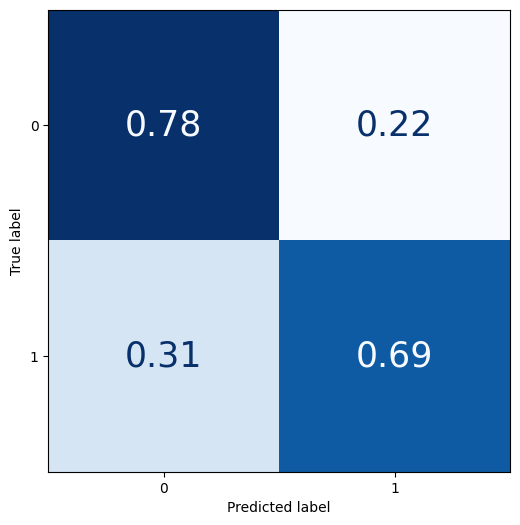

Pareizība:  0.7686812401771682
Atsaukums:  0.6877124817872754
Pricizitāte:  0.3530291697830965
F1:  0.46655683690280064
[[0.78264511 0.21735489]
 [0.31228752 0.68771248]]


In [207]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_LR, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_LR)
print('Atsaukums: ', rec_LR)
print('Pricizitāte: ', prec_LR)
print('F1: ', f1_LR)
print(cm_LR)

Lēmumu koks

In [221]:
model_DT = DecisionTreeClassifier(random_state=24, criterion='gini', max_depth=2)
model_DT.fit(train_data_var, train_class)
test_class_DT = model_DT.predict(test_data_var)

In [222]:
acc_DT = accuracy_score(test_class, test_class_DT)
prec_DT = precision_score(test_class, test_class_DT)
rec_DT = recall_score(test_class, test_class_DT)
f1_DT = f1_score(test_class, test_class_DT)
cm_DT = confusion_matrix(test_class, test_class_DT, normalize='true')

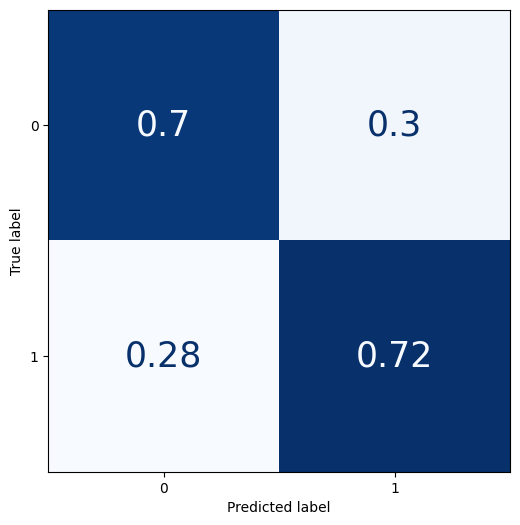

Pareizība:  0.7038862694670667
Atsaukums:  0.7168528411850413
Pricizitāte:  0.2929734021437078
F1:  0.4159504015781316


In [223]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_DT)
print('Atsaukums: ', rec_DT)
print('Pricizitāte: ', prec_DT)
print('F1: ', f1_DT)

Gadījumu mežs

In [299]:
model_RF = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=2, criterion='gini') #max_depth=10, min_samples_split=5, class_weight='balanced', criterion='entropy', random_state=42
model_RF.fit(train_data_var, train_class)
test_class_RF = model_RF.predict(test_data_var)

In [300]:
cm_RF = confusion_matrix(test_class, test_class_RF, normalize='true')
rec_RF = recall_score(test_class, test_class_RF)
acc_RF = accuracy_score(test_class, test_class_RF)
prec_RF = precision_score(test_class, test_class_RF)
f1_RF = f1_score(test_class, test_class_RF)

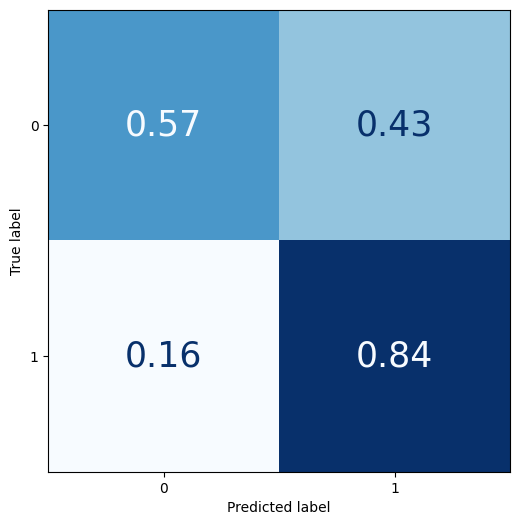

Pareizība:  0.6068009715673668
Atsaukums:  0.8368139873725109
Pricizitāte:  0.25003627920475985
F1:  0.3850279329608939


In [301]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_RF)
print('Atsaukums: ', rec_RF)
print('Pricizitāte: ', prec_RF)
print('F1: ', f1_RF)

Atbalsta vektora mašīna

In [302]:
model_SVM = svm.SVC(kernel='rbf', random_state=1)
model_SVM.fit(train_data_var, train_class)
test_class_SVM = model_SVM.predict(test_data_var)

In [303]:
cm_SVM = confusion_matrix(test_class, test_class_SVM, normalize='true')
acc_SVM = accuracy_score(test_class, test_class_SVM)
prec_SVM = precision_score(test_class, test_class_SVM)
rec_SVM = recall_score(test_class, test_class_SVM)
f1_SVM = f1_score(test_class, test_class_SVM)

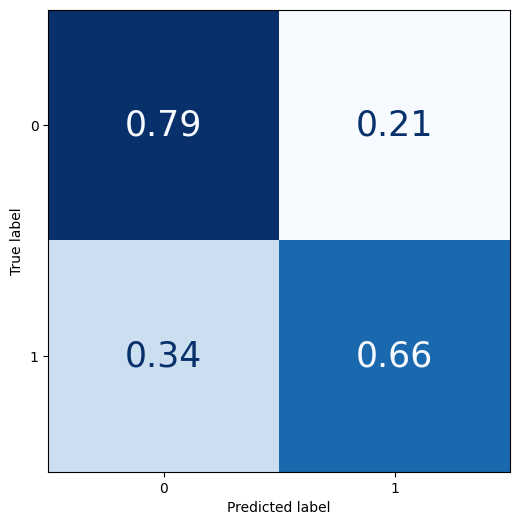

Pareizība:  0.7679668524074867
Atsaukums:  0.6619718309859155
Pricizitāte:  0.34814814814814815
F1:  0.4563106796116505


In [304]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_SVM)
print('Atsaukums: ', rec_SVM)
print('Pricizitāte: ', prec_SVM)
print('F1: ', f1_SVM)

Gradienta palielināšanas

In [335]:
model_GB = GradientBoostingClassifier(random_state=42,  max_depth=3, learning_rate=0.1, n_estimators=500) #, n_estimators=100, max_depth=3, min_samples_leaf=5
model_GB.fit(train_data_var, train_class)
test_class_GB = model_GB.predict(test_data_var)

In [336]:
cm_GB = confusion_matrix(test_class, test_class_GB, normalize='true')
acc_GB = accuracy_score(test_class, test_class_GB)
rec_GB = recall_score(test_class, test_class_GB)
prec_GB = precision_score(test_class, test_class_GB)
f1_GB = f1_score(test_class, test_class_GB)

In [ ]:
# cm_GB = confusion_matrix(test_class, test_class_GB, normalize='true')
# acc_GB = accuracy_score(test_class, test_class_GB)
# rec_GB = recall_score(test_class, test_class_GB, average='macro')
# prec_GB = precision_score(test_class, test_class_GB, average='macro')
# f1_GB = f1_score(test_class, test_class_GB, average='macro')

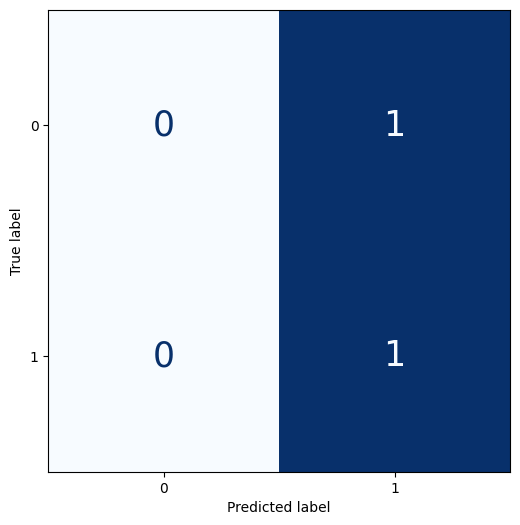

Pareizība:  0.14709244177739678
Atsaukums:  1.0
Pricizitāte:  0.14709244177739678
F1:  0.25646135641776174


In [337]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_GB, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_GB)
print('Atsaukums: ', rec_GB)
print('Pricizitāte: ', prec_GB)
print('F1: ', f1_GB)

Ekstrēma gradieta palielināšanas

In [406]:
model_XGB = XGBClassifier(learning_rate=0.01, max_depth=2, min_child_weight=3, n_estimators=500) 
model_XGB.fit(train_data_var, train_class)
test_class_XGB = model_XGB.predict(test_data_var)

In [407]:
cm_XGB = confusion_matrix(test_class, test_class_XGB, normalize='true')
acc_XGB = accuracy_score(test_class, test_class_XGB)
rec_XGB = recall_score(test_class, test_class_XGB)
prec_XGB = precision_score(test_class, test_class_XGB)
f1_XGB = f1_score(test_class, test_class_XGB)

In [68]:
# cm_XGB = confusion_matrix(test_class, test_class_XGB, normalize='true')
# acc_XGB = accuracy_score(test_class, test_class_XGB)
# rec_XGB = recall_score(test_class, test_class_XGB, average='macro')
# prec_XGB = precision_score(test_class, test_class_XGB, average='macro')
# f1_XGB = f1_score(test_class, test_class_XGB, average='macro')

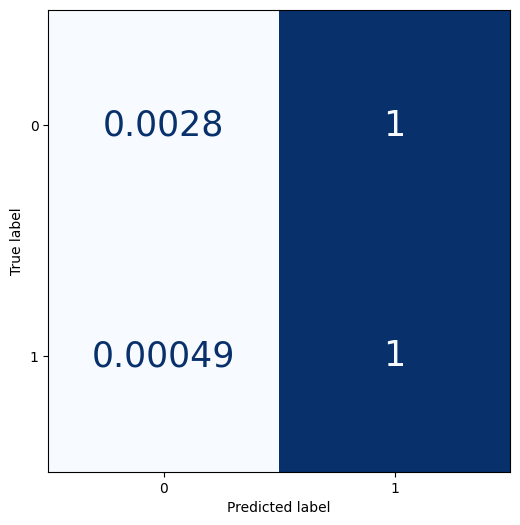

Pareizība:  0.1493784826403772
Atsaukums:  0.9995143273433705
Pricizitāte:  0.14737897450587226
F1:  0.25688073394495414


In [408]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB, display_labels=['0', '1'], )
fig, ax = plt.subplots(figsize=(8, 6)) 
disp.plot(cmap=plt.cm.Blues, ax=ax, colorbar=False)
for text in disp.text_.ravel():  
    text.set_fontsize(25)
plt.show()

print('Pareizība: ', acc_XGB)
print('Atsaukums: ', rec_XGB)
print('Pricizitāte: ', prec_XGB)
print('F1: ', f1_XGB)

Visas pārpratuma matricas

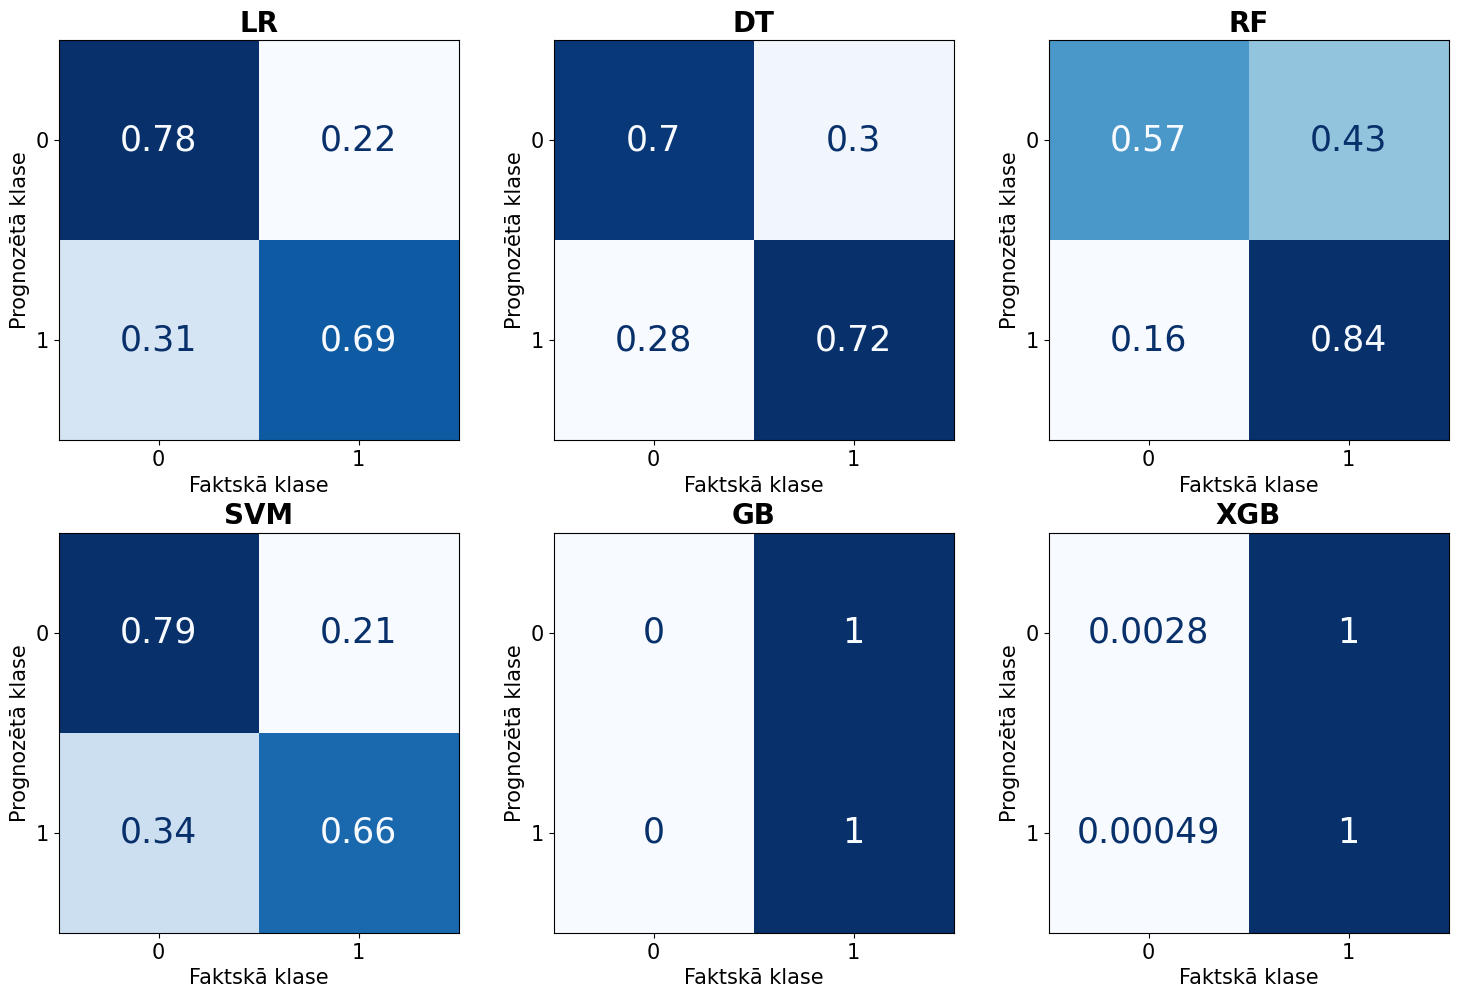

In [409]:
models = ['LR', 'DT', 'RF', 'SVM', 'GB', 'XGB']
predictions = [test_class_LR, test_class_DT, test_class_RF, test_class_SVM, test_class_GB, test_class_XGB]  
true_labels = test_class 

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  
axes = axes.ravel() 
for i, ax in enumerate(axes):
    cm = confusion_matrix(true_labels, predictions[i], normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    ax.tick_params(axis='both', labelsize=15)
    for text in disp.text_.ravel():  
        text.set_fontsize(25)
    ax.set_title(models[i], fontsize=20, fontweight='bold')
    ax.set_xlabel('Faktskā klase', fontsize=15)
    ax.set_ylabel('Prognozētā klase', fontsize=15)

plt.tight_layout()
plt.show()

Visās ROC liknes

In [410]:
def calc_roc(y_true, y_pred):
    fpr, tpr, th = metrics.roc_curve(y_true=y_true, y_score=y_pred)
    auc = metrics.roc_auc_score(y_true=y_true, y_score=y_pred)
    return fpr, tpr, th, auc

def plot_roc(y_true, y_pred, name, ax=None):
    fpr, tpr, th, auc = calc_roc(y_true=y_true, y_pred=y_pred)
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.3f)' % (name, auc))

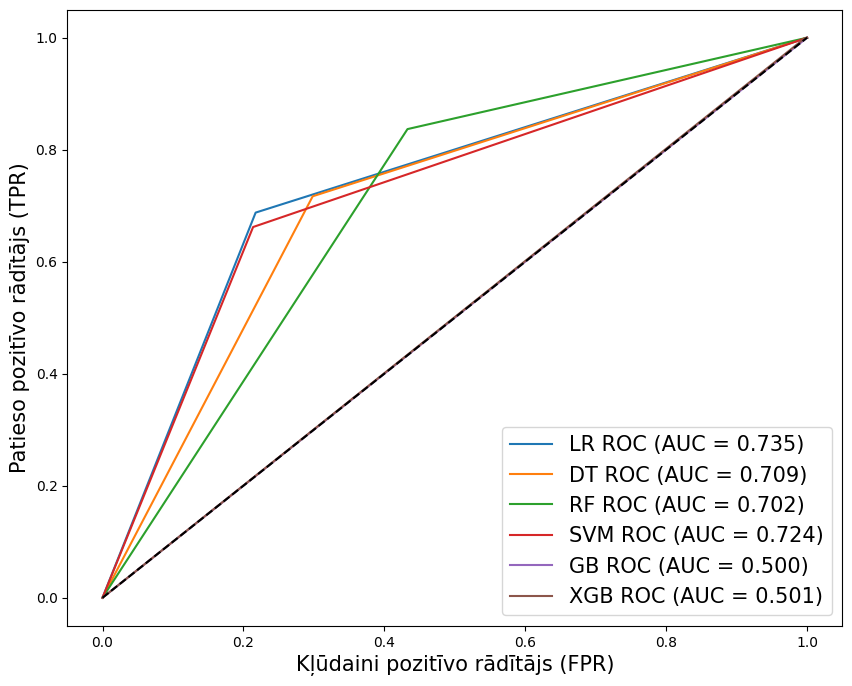

In [411]:
plt.figure(figsize=(10, 8))

plot_roc(y_true=test_class, y_pred=test_class_LR, name='LR')
plot_roc(y_true=test_class, y_pred=test_class_DT, name='DT')
plot_roc(y_true=test_class, y_pred=test_class_RF, name='RF')    
plot_roc(y_true=test_class, y_pred=test_class_SVM, name='SVM')
plot_roc(y_true=test_class, y_pred=test_class_GB, name='GB')
plot_roc(y_true=test_class, y_pred=test_class_XGB, name='XGB')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Kļūdaini pozitīvo rādītājs (FPR)', fontsize=15)
plt.ylabel('Patieso pozitīvo rādītājs (TPR)', fontsize=15)
plt.legend(loc='lower right', fontsize = 15)
plt.show()
plt.close();